In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Documents\Hair_Tracker_AI\Datasets_All\Hair_Fall\hair_fall.csv')

df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [4]:
df.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

In [5]:
df=df.drop(['Id'],axis=1)

In [6]:
df=df.dropna()
print(df.isnull().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64
0


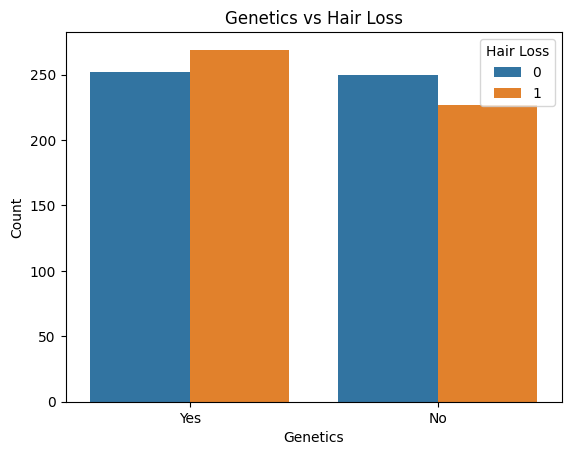

In [7]:
import seaborn as sns
sns.countplot(data=df, x='Genetics', hue='Hair Loss')
plt.title('Genetics vs Hair Loss')
plt.xlabel('Genetics')
plt.ylabel('Count')
plt.show()

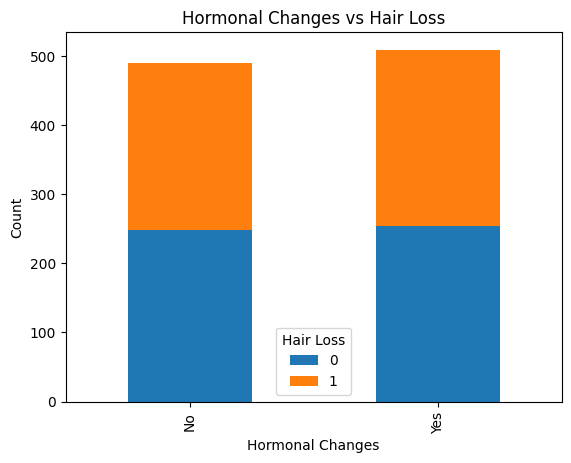

In [8]:
stacked_data = pd.crosstab([df['Hormonal Changes']], df['Hair Loss'])
stacked_data.plot(kind='bar', stacked=True)
plt.title('Hormonal Changes vs Hair Loss')
plt.xlabel('Hormonal Changes')
plt.ylabel('Count')
plt.show()


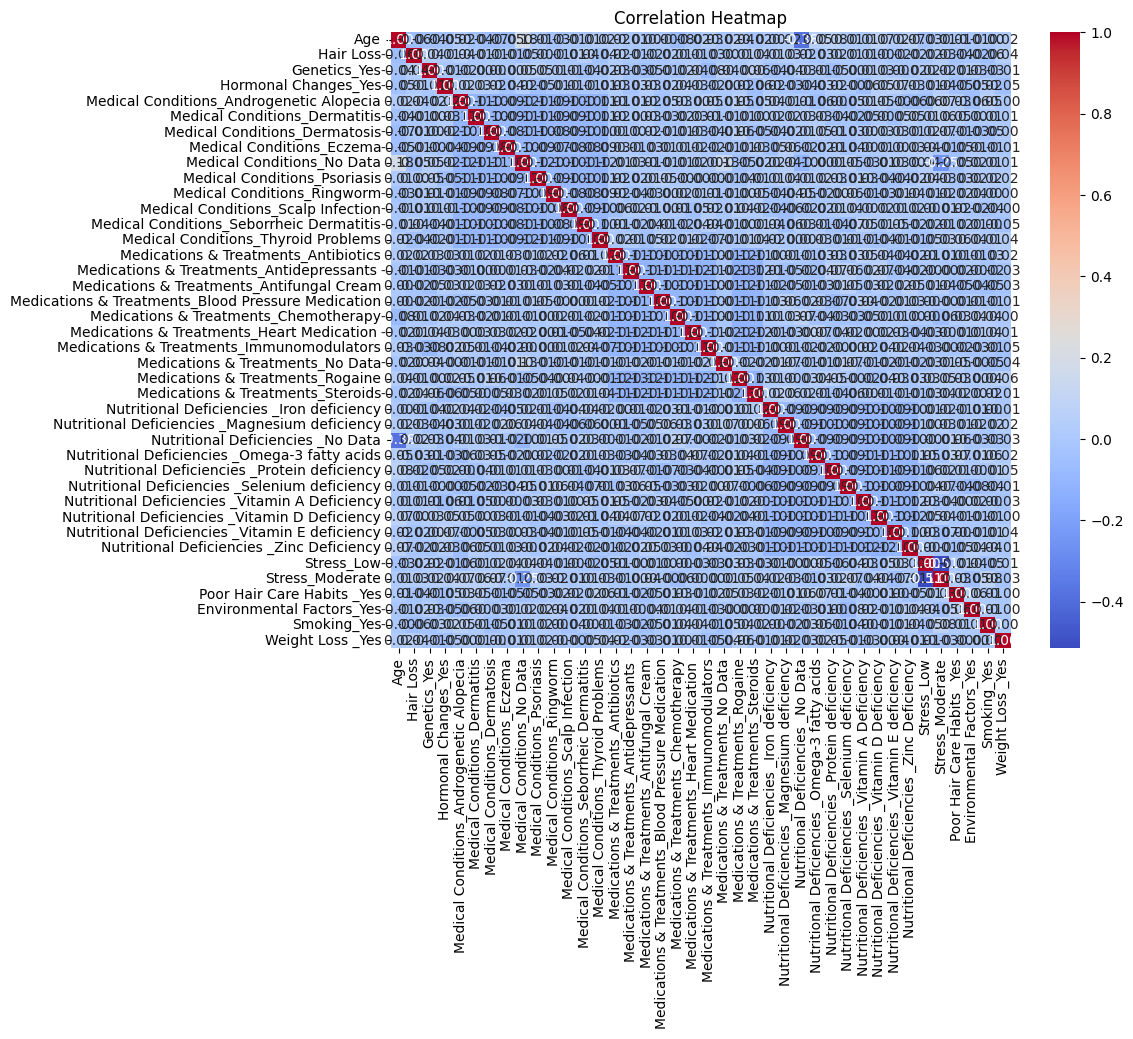

In [12]:
df_numeric = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

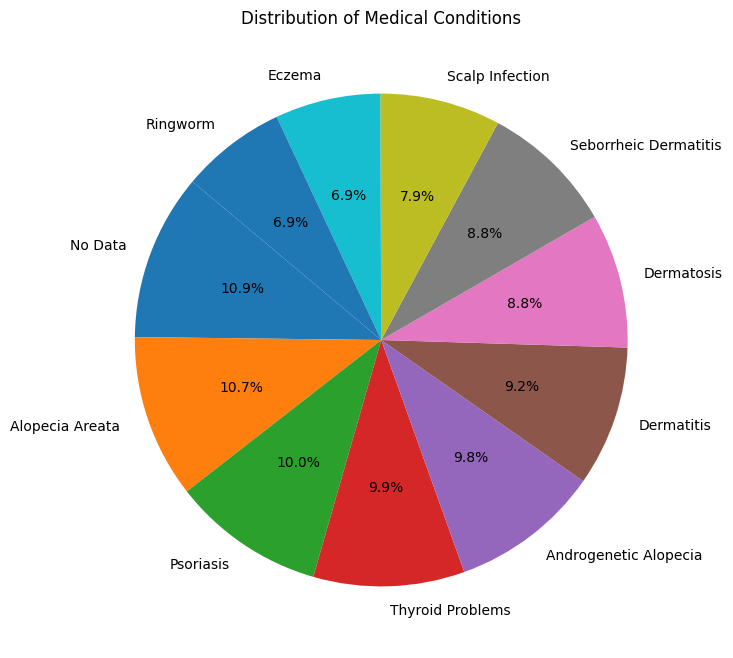

In [11]:
medical_conditions = df['Medical Conditions'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(medical_conditions, labels=medical_conditions.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Medical Conditions')
plt.show()

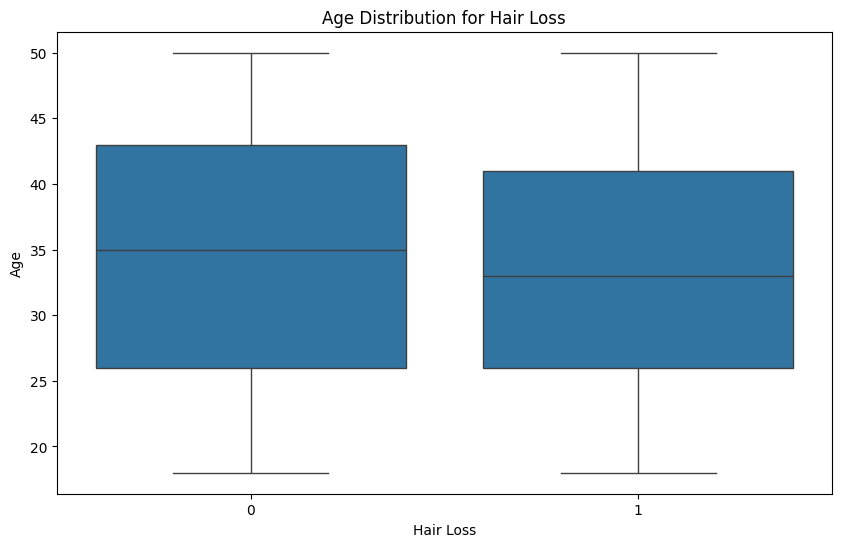

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Hair Loss', y='Age')
plt.title('Age Distribution for Hair Loss')
plt.xlabel('Hair Loss')
plt.ylabel('Age')
plt.show()

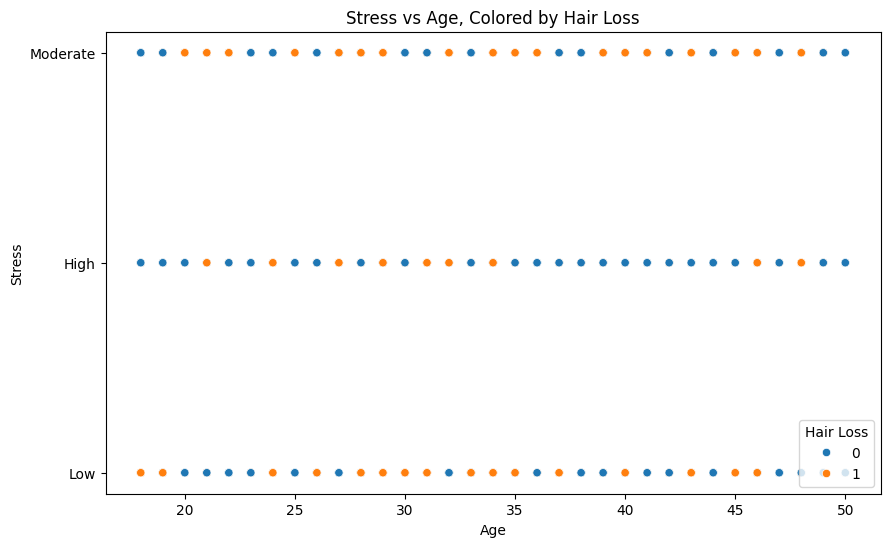

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Stress', hue='Hair Loss')
plt.title('Stress vs Age, Colored by Hair Loss')
plt.xlabel('Age')
plt.ylabel('Stress')
plt.show()

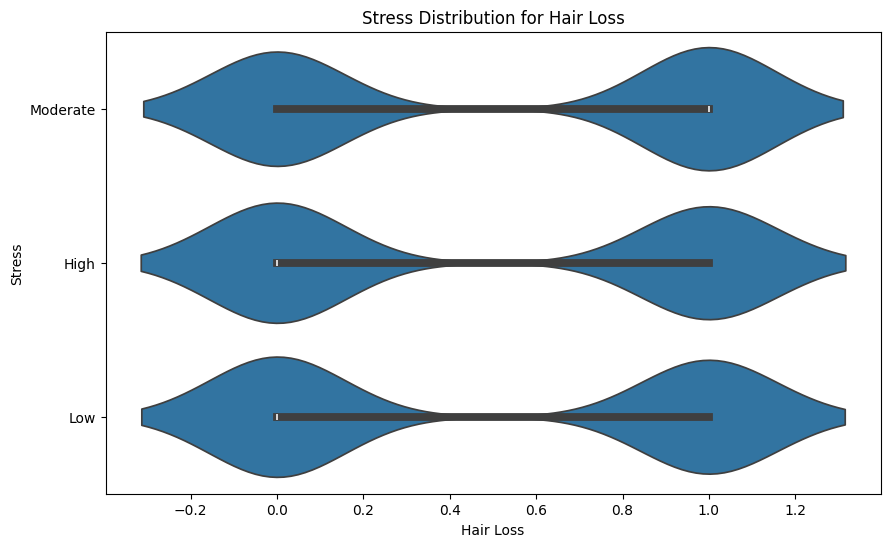

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Hair Loss', y='Stress')
plt.title('Stress Distribution for Hair Loss')
plt.xlabel('Hair Loss')
plt.ylabel('Stress')
plt.show()

In [7]:
df.dtypes

,0
Genetics,object
Hormonal Changes,object
Medical Conditions,object
Medications & Treatments,object
Nutritional Deficiencies,object
Stress,object
Age,int64
Poor Hair Care Habits,object
Environmental Factors,object
Smoking,object


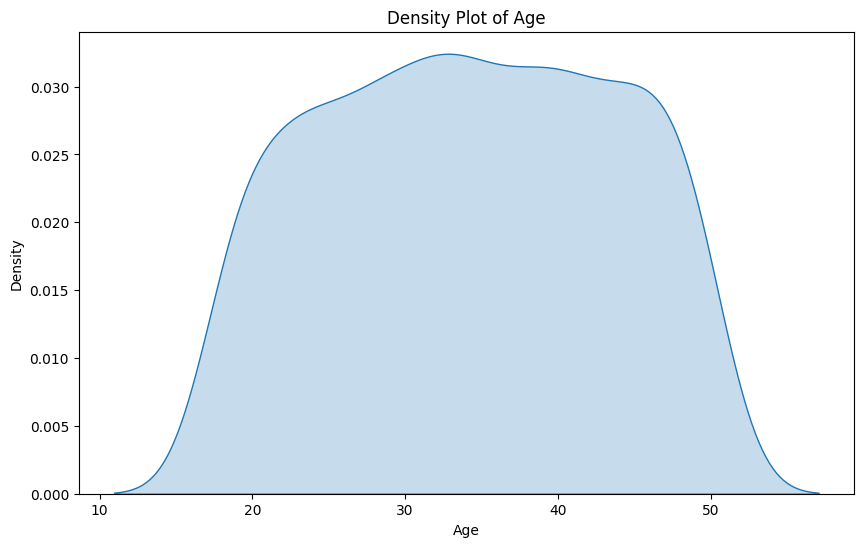

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', fill=True)
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

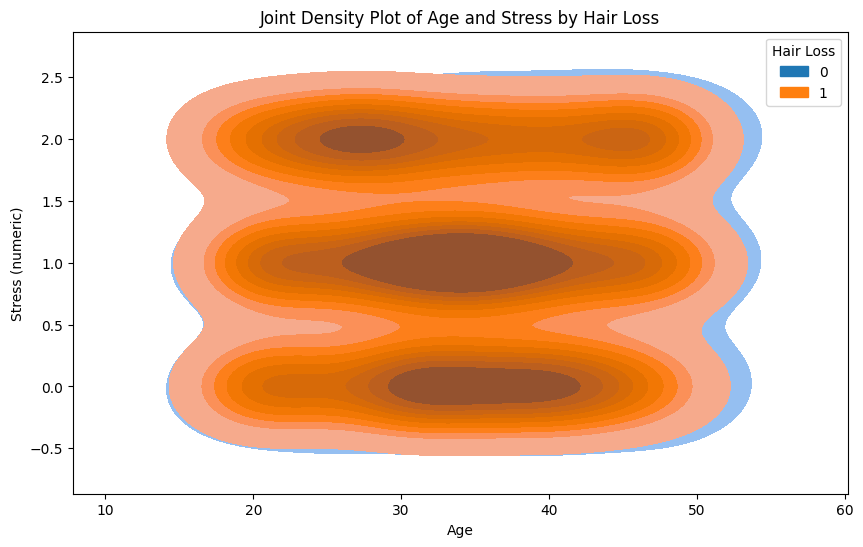

In [19]:
stress_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
df['Stress_numeric'] = df['Stress'].map(stress_mapping)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', y='Stress_numeric', hue='Hair Loss', fill=True)
plt.title('Joint Density Plot of Age and Stress by Hair Loss')
plt.xlabel('Age')
plt.ylabel('Stress (numeric)')
plt.show()

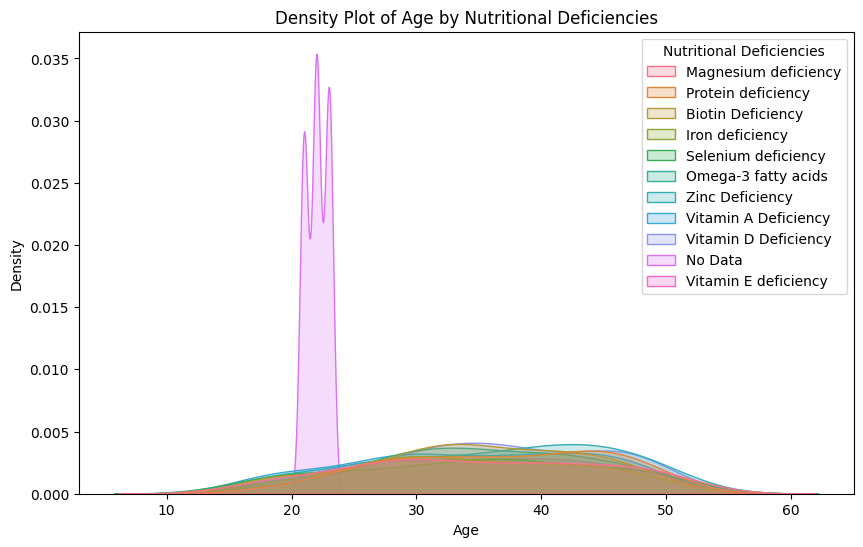

In [21]:
df.columns = df.columns.str.strip()
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Nutritional Deficiencies', fill=True)
plt.title('Density Plot of Age by Nutritional Deficiencies')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
df.columns = df.columns.str.strip()

categorical_columns = ['Genetics', 'Hormonal Changes', 'Medical Conditions',
                       'Medications & Treatments', 'Nutritional Deficiencies',
                       'Stress', 'Poor Hair Care Habits', 'Environmental Factors',
                       'Smoking', 'Weight Loss']
numerical_columns = ['Age']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())

   Genetics  Hormonal Changes  Medical Conditions  Medications & Treatments  \
0         1                 0                   5                         8   
1         0                 0                   4                         1   
2         0                 0                   3                         3   
3         1                 1                   7                         1   
4         0                 0                   6                         0   

   Nutritional Deficiencies  Stress       Age  Poor Hair Care Habits  \
0                         2       2 -1.623716                      1   
1                         2       0  0.939303                      1   
2                         5       2 -0.876169                      1   
3                         0       2  1.259680                      1   
4                         1       2 -0.448999                      0   

   Environmental Factors  Smoking  Weight Loss  Hair Loss  Stress_numeric  
0               

In [25]:
X= df.drop(['Hair Loss'],axis=1)
y= df['Hair Loss']

from sklearn.model_selection import train_test_split ,RandomizedSearchCV,GridSearchCV,cross_val_score

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf=2, max_depth= 20, bootstrap= False)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(classifier, X, y, cv=skf)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.46       0.545      0.495      0.47236181 0.52261307]


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5)
print("XGBoost Cross-Validation Scores:", xgb_cv_scores)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
                           param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'subsample': 0.6}
Best cross-validation score: 0.523065326633166


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:29:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from lightgbm import LGBMClassifier
lgb_model = LGBMClassifier()
cv_scores = cross_val_score(lgb_model, X, y, cv=5)
print("LightGBM Cross-Validation Scores:", cv_scores)


In [ ]:
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [20, 40, 60]
}

grid_search = GridSearchCV(estimator=lgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 496, number of negative: 502
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 998, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496994 -> initscore=-0.012024
[LightGBM] [Info] Start training from score -0.012024
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 60, 'num_leaves': 31}
Best Score: 0.5240753768844221


In [ ]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=1000,
                                     depth=6,
                                     learning_rate=0.1,
                                     loss_function='MultiClass',
                                     verbose=0)
cv_scores = cross_val_score(catboost_model, X, y, cv=5)
print("CatBoost Cross-Validation Scores:", cv_scores)

CatBoost Cross-Validation Scores: [0.465      0.49       0.535      0.48743719 0.50251256]


In [ ]:
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [50, 100, 200],
    'l2_leaf_reg': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=catboost_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'depth': 4, 'iterations': 50, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Best Score: 0.5190904522613067


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')
print("KNN Cross-Validation Scores:", cv_scores)

KNN Cross-Validation Scores: [0.53       0.515      0.495      0.48743719 0.48743719]


In [ ]:
param_grid = {
    'n_neighbors': [3,5,7,9,11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20,30,50],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score: 0.5210251256281407


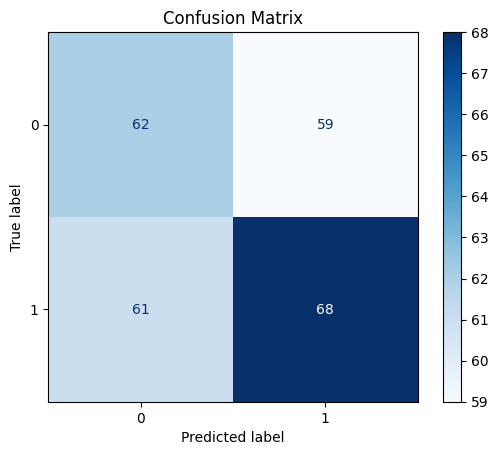

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = y_test.unique()
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51       121
           1       0.54      0.53      0.53       129

    accuracy                           0.52       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.52      0.52      0.52       250



In [ ]:
param_dist = {
    'n_estimators': [100,300,500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist,
                                   n_iter=10, cv=2, verbose=0, random_state=42)

random_search.fit(X_train, y_train)
print("Best parameters found: ", random_search.best_params_)
best_rf = random_search.best_estimator_
print("Test set accuracy: ", best_rf.score(X_test, y_test))

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
Test set accuracy:  0.536


In [11]:
!pip install catboost
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('lgb', LGBMClassifier()),
    ('cat', CatBoostClassifier(silent=True))
]

meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {accuracy:.4f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:25:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 367, number of negative: 381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 748, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490642 -> initscore=-0.037438
[LightGBM] [Info] Start training from score -0.037438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:25:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:25:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:25:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:25:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:25:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 293, number of negative: 305
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 598, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489967 -> initscore=-0.040139
[LightGBM] [Info] Start training from score -0.040139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [12]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('lgb', LGBMClassifier()),
    ('cat', CatBoostClassifier(silent=True))
]

voting_model = VotingClassifier(estimators=base_models, voting='hard')  # Use 'soft' for probability-based voting

voting_model.fit(X_train, y_train)

y_pred = voting_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Model Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:26:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 367, number of negative: 381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 748, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490642 -> initscore=-0.037438
[LightGBM] [Info] Start training from score -0.037438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5]) 
n_classes = y_test_bin.shape[1]

y_pred_proba = stacking_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

for i in range(n_classes):
    print(f'AUC for Class {i}: {roc_auc[i]:.4f}')